# **Classification Models**

## **Import Dataset**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("preprocessed_data.csv")

In [19]:
data

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class,bmi
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,22.79
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,17.78
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,22.46
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,21.21
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12726,39.0,M,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,B,21.14
12727,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,21.78
12728,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,18.39
12729,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,23.57


In [20]:
data['class'].value_counts()

class
C    3327
A    3322
B    3322
D    2760
Name: count, dtype: int64

## **Train-Test Splitting**

In [21]:
from sklearn.model_selection import train_test_split

feature_cols = ['age','height_cm','weight_kg','body_fat_%','diastolic',
                'systolic','gripforce','sit_and_bend_forward_cm','sit_ups_counts','broad_jump_cm',
                'bmi']
x = data[feature_cols]
y = data['class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y) # 70% training and 30% test

y_train.value_counts()

class
C    2661
A    2658
B    2657
D    2208
Name: count, dtype: int64

## **Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = data['class'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
class
C    3327
A    3322
B    3322
D    2760
Name: count, dtype: int64

Gini Impurity of the class is 0.749


In [25]:
def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = data['class'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in feature_cols:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.741
Gini for height_cm is 0.718
Gini for weight_kg is 0.659
Gini for body_fat_% is 0.691
Gini for diastolic is 0.743
Gini for systolic is 0.743
Gini for gripforce is 0.702
Gini for sit_and_bend_forward_cm is 0.603
Gini for sit_ups_counts is 0.691
Gini for broad_jump_cm is 0.714
Gini for bmi is 0.646


In [7]:
from sklearn.tree import export_text

r = export_text(clf)
print(r)

|--- feature_7 <= 14.95
|   |--- feature_7 <= 5.25
|   |   |--- feature_0 <= 56.50
|   |   |   |--- feature_7 <= 4.55
|   |   |   |   |--- feature_5 <= 158.50
|   |   |   |   |   |--- class: D
|   |   |   |   |--- feature_5 >  158.50
|   |   |   |   |   |--- feature_4 <= 90.00
|   |   |   |   |   |   |--- class: C
|   |   |   |   |   |--- feature_4 >  90.00
|   |   |   |   |   |   |--- class: D
|   |   |   |--- feature_7 >  4.55
|   |   |   |   |--- feature_0 <= 29.00
|   |   |   |   |   |--- class: D
|   |   |   |   |--- feature_0 >  29.00
|   |   |   |   |   |--- feature_8 <= 30.50
|   |   |   |   |   |   |--- class: D
|   |   |   |   |   |--- feature_8 >  30.50
|   |   |   |   |   |   |--- feature_3 <= 26.30
|   |   |   |   |   |   |   |--- feature_2 <= 83.75
|   |   |   |   |   |   |   |   |--- feature_6 <= 30.25
|   |   |   |   |   |   |   |   |   |--- class: D
|   |   |   |   |   |   |   |   |--- feature_6 >  30.25
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 53.20
|   |

In [37]:
# plt.figure(figsize = (600,200))

# plot_tree(clf,filled=True,
#             feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=11)

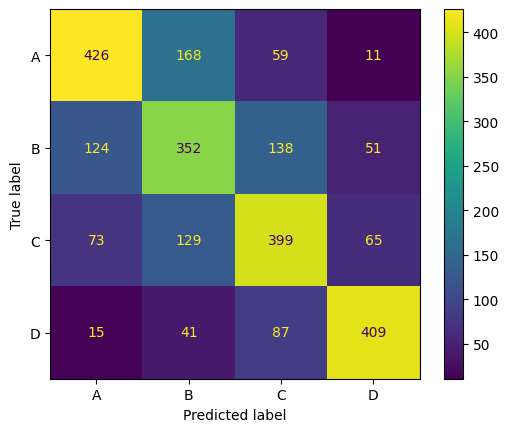

In [8]:
class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.67      0.64      0.65       664
           B       0.51      0.53      0.52       665
           C       0.58      0.60      0.59       666
           D       0.76      0.74      0.75       552

    accuracy                           0.62      2547
   macro avg       0.63      0.63      0.63      2547
weighted avg       0.63      0.62      0.62      2547



In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[Text(1200.4342105263158, 1744.05, 'sit_and_bend_forward_cm <= 14.35\nentropy = 1.996\nsamples = 10184\nvalue = [2658, 2657, 2661, 2208]\nclass = C'),
 Text(583.6973684210526, 1426.9499999999998, 'sit_and_bend_forward_cm <= 7.05\nentropy = 1.639\nsamples = 3852\nvalue = [82, 763, 1430, 1577]\nclass = D'),
 Text(242.28947368421052, 1109.85, 'sit_and_bend_forward_cm <= 4.45\nentropy = 0.764\nsamples = 1165\nvalue = [0, 0, 259, 906]\nclass = D'),
 Text(88.10526315789474, 792.75, 'age <= 55.5\nentropy = 0.261\nsamples = 679\nvalue = [0, 0, 30, 649]\nclass = D'),
 Text(44.05263157894737, 475.6500000000001, 'entropy = 0.0\nsamples = 575\nvalue = [0, 0, 0, 575]\nclass = D'),
 Text(132.1578947368421, 475.6500000000001, 'sit_and_bend_forward_cm <= 2.25\nentropy = 0.867\nsamples = 104\nvalue = [0, 0, 30, 74]\nclass = D'),
 Text(88.10526315789474, 158.55000000000018, 'entropy = 0.0\nsamples = 46\nvalue = [0, 0, 0, 46]\nclass = D'),
 Text(176.21052631578948, 158.55000000000018, 'entropy = 0.999\ns

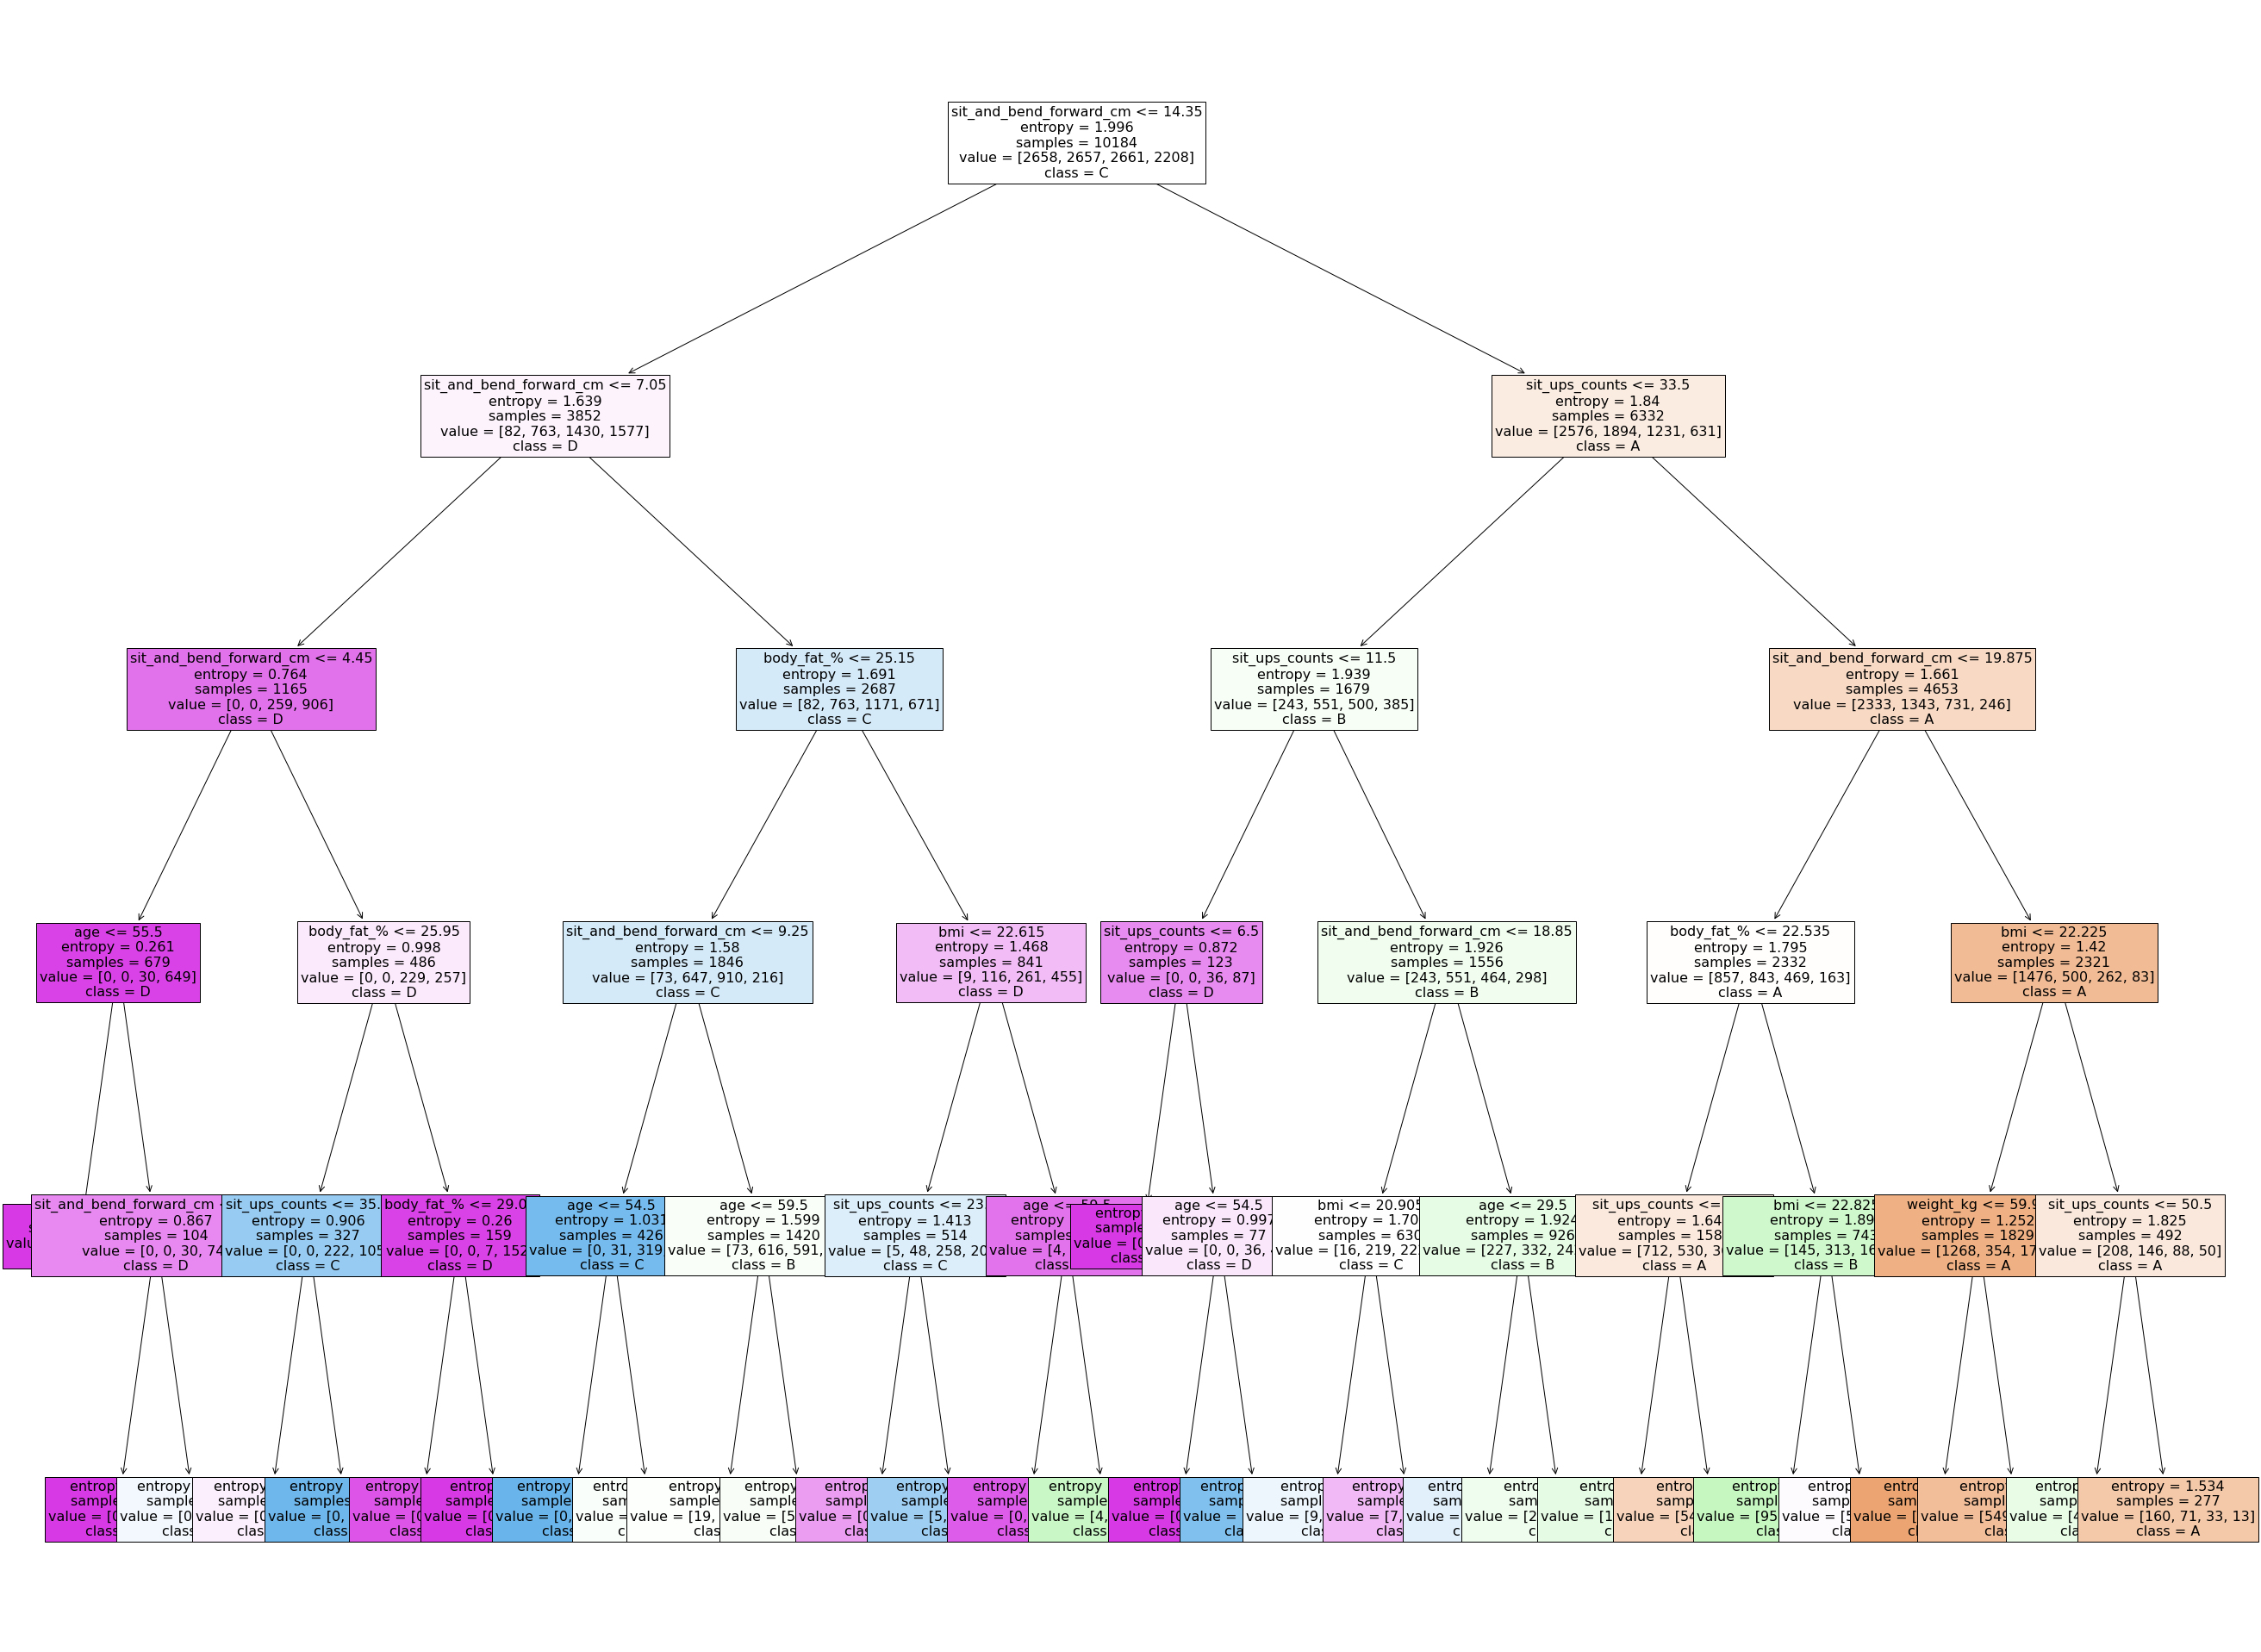

In [41]:
plt.figure(figsize = (45,35))

plot_tree(clf,filled=True,
            feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=16)
#pydotplus.graph_from_dot_data(dot_data)  
#fig.savefig('imagename.png')
#graph.show_png('diabetes.png')
#Image(graph.create_png())

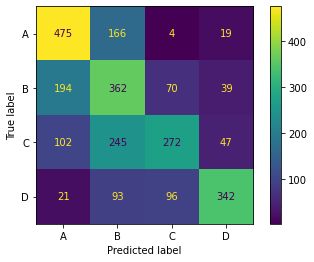

In [42]:
class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.60      0.72      0.65       664
           B       0.42      0.54      0.47       665
           C       0.62      0.41      0.49       666
           D       0.77      0.62      0.68       552

    accuracy                           0.57      2547
   macro avg       0.60      0.57      0.58      2547
weighted avg       0.59      0.57      0.57      2547



## **KNN**

### **Function of KNN**


In [44]:
from collections import Counter
import math
import pandas as pd

def knn(data, query, k, distance_fn, choice_fn, attrNumber):
    neighbor_distances_and_indices = []
    
    # For each example in the data
    for index, example in enumerate(data):
        # Calculate the distance between the query example and the current
        distance = distance_fn(example, query, attrNumber)
        
        # Add the distance and the label of the example to array
        neighbor_distances_and_indices.append((distance, index))
    
    # Sort the array from smallest to largest by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # Pick the first K entries from the sorted array
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # Return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(sample, target, attrNumber):
    sum_squared_distance = 0
    for i in range(attrNumber):
        sum_squared_distance += math.pow(sample[i] - target[i], 2)
    return math.sqrt(sum_squared_distance)



### **Splitting data and use KNN model**


In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

attrNumber = len(feature_cols)

train_data = X_train.copy()
train_data["class"] = y_train
test_data = X_test.copy()
test_data["class"] = y_test

predict = []
train_data = train_data.values.tolist()
test_data = test_data.values.tolist()
for i in range(len(test_data)):
    test = test_data[i]
    reg_k_nearest_neighbors, reg_prediction = knn(
        train_data, test, k=101, distance_fn=euclidean_distance, choice_fn=mode, attrNumber=attrNumber
    )
    predict.append(reg_prediction)

In [46]:
print("predicted class in array\n",predict)
real = y_test.to_list()

print("real class in array\n",real)

count = 0
for i in range(len(real)):
    if predict[i] == real[i]:
        count=count+1

print("\ncorrect prediction: ",str(count))
print("from total record: ",len(real))

predicted class in array
 ['D', 'B', 'C', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'D', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'D', 'D', 'A', 'B', 'D', 'A', 'B', 'D', 'B', 'D', 'C', 'C', 'C', 'A', 'C', 'B', 'C', 'C', 'B', 'D', 'A', 'B', 'C', 'C', 'A', 'D', 'A', 'C', 'B', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'B', 'A', 'D', 'D', 'A', 'C', 'A', 'C', 'D', 'B', 'B', 'A', 'A', 'B', 'B', 'C', 'D', 'A', 'C', 'A', 'C', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'A', 'B', 'A', 'A', 'C', 'D', 'A', 'C', 'D', 'A', 'C', 'C', 'A', 'B', 'C', 'C', 'B', 'C', 'D', 'B', 'A', 'B', 'C', 'C', 'B', 'A', 'A', 'B', 'A', 'D', 'C', 'D', 'C', 'A', 'C', 'B', 'B', 'C', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'D', 'B', 'A', 'C', 'C', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'D', 'C', 'B', 'C', 'C', 'C', 'B', 'D', 'C', 'B', 'B', 'A', 'A', 'D', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'D', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'C', 'A', 'D', 'D', 'A', 'A', 'A', 'A', 'B', 'C', 'D', 'A', 'D', 'C', 'A', 'B'

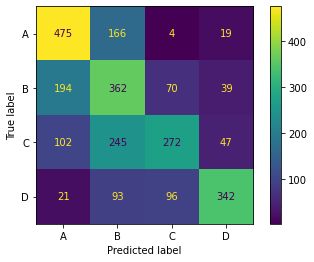

In [47]:
class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

### **Show the ML metrics <br> Precision, Recall, F-measure**


In [48]:
print(classification_report(real, predict))

              precision    recall  f1-score   support

           A       0.59      0.76      0.67       664
           B       0.42      0.47      0.44       665
           C       0.50      0.48      0.49       666
           D       0.86      0.50      0.63       552

    accuracy                           0.55      2547
   macro avg       0.59      0.55      0.56      2547
weighted avg       0.58      0.55      0.55      2547



## **Random Forest**

In [49]:
# Import data

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [50]:
# train model

rf = RandomForestClassifier(n_estimators = 800)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [51]:
rf.feature_importances_

array([0.08491932, 0.06354688, 0.07311052, 0.08798277, 0.04681436,
       0.04994641, 0.08324882, 0.23536795, 0.12536504, 0.07183147,
       0.07786644])

In [52]:
# prediction

y_pred = rf.predict(X_test)

In [53]:
type(y_test)

pandas.core.series.Series

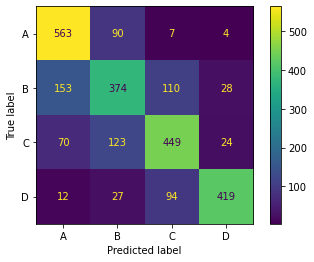

In [54]:
# confusion matrix

class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

In [55]:
# Evaluation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.71      0.85      0.77       664
           B       0.61      0.56      0.58       665
           C       0.68      0.67      0.68       666
           D       0.88      0.76      0.82       552

    accuracy                           0.71      2547
   macro avg       0.72      0.71      0.71      2547
weighted avg       0.71      0.71      0.71      2547



## **Adaboost**

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [57]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [58]:
# Calculation score on Train data Adaboost Classifer
print("AdaBoost Classifier Model Accuracy on train data:", model1.score(X_train, y_train))

AdaBoost Classifier Model Accuracy on train data: 0.60143362136685


In [59]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# calculate and print model accuracy on test data
print("AdaBoost Classifier Model Accuracy on test data:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy on test data: 0.579897919120534


In [60]:
# Create a confusion matrix
metrics.confusion_matrix(y_test, y_pred)

print("Confusion matrix: ","\n\nX: Predicted values","\nY: Real values\n\n",cm)
print("\tA\tB\tC\tD")
temp = ["A","B","C","D"]

for i in range(4):
    print(temp[i],end="")
    for j in range(4):
        print("\t",cm[i][j],end="")
    print("")

Confusion matrix:  

X: Predicted values 
Y: Real values

 [[563  90   7   4]
 [153 374 110  28]
 [ 70 123 449  24]
 [ 12  27  94 419]]
	A	B	C	D
A	 563	 90	 7	 4
B	 153	 374	 110	 28
C	 70	 123	 449	 24
D	 12	 27	 94	 419


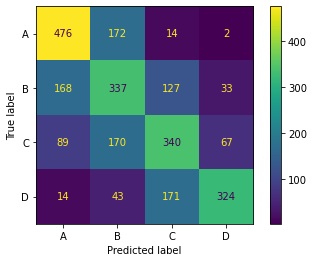

In [61]:
class_name = ['A','B','C','D']

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name).plot()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.64      0.72      0.67       664
           B       0.47      0.51      0.49       665
           C       0.52      0.51      0.52       666
           D       0.76      0.59      0.66       552

    accuracy                           0.58      2547
   macro avg       0.60      0.58      0.58      2547
weighted avg       0.59      0.58      0.58      2547



===================================================================

In [63]:
# y_test = np.random.binomial(1,.9,size = 1000)
# y_pred = np.random.binomial(1,.9,size = 1000)

# cm = metrics.confusion_matrix(y_test, y_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [64]:
# Accuracy = metrics.accuracy_score(y_test, y_pred)
# Precision = metrics.precision_score(y_test, y_pred)
# Sensitivity_recall = metrics.recall_score(y_test, y_pred)
# Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
# F1_score = metrics.f1_score(y_test, y_pred)

In [65]:
# print("Accuracy: ", Accuracy)
# print("Precision: ", Precision)
# print("Sensitivity recall: ", Sensitivity_recall)
# print("Specificity : ", Specificity)
# print("F1 score : ", F1_score)